In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
datasets = ['SBM-1', 'SBM-2', 'SBM-3', 'ER-4', 'ER-5', 'PROTEINS']
train_ratio_list = [0.7, 0.9] 
GNN_list = ['GCN_mean', 'GCN_RW_mean', 'MPGNN_mean', 'GCN_sum', 'GCN_RW_sum', 'MPGNN_sum']
hidden_list = [4, 8, 16, 32, 64, 128, 256]
seed_list = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
alpha = 100
delta = 0.05

In [3]:
GE_bound_results_mean = np.zeros((len(datasets) * len(train_ratio_list), len(GNN_list)))
GE_bound_results_mean[:] = np.nan
GE_bound_results_std = GE_bound_results_mean.copy()
for model_ind, model_type in enumerate(GNN_list):
    print(model_type)
    all_ge_results = np.zeros((len(datasets) * len(train_ratio_list), len(hidden_list), len(seed_list)))
    all_ge_results[:] = np.nan
    all_bound_results = np.zeros((len(datasets) * len(train_ratio_list), len(hidden_list), len(seed_list)))
    all_bound_results[:] = np.nan
    all_improved_bound_results = np.zeros((len(datasets) * len(train_ratio_list), len(hidden_list), len(seed_list)))
    all_improved_bound_results[:] = np.nan
    combo_list = []
    first_ind = 0
    for dataset in datasets:
        for train_ratio in train_ratio_list:
            for hidden_ind, hidden_dim in enumerate(hidden_list):
                for seed_ind, random_seed in enumerate(seed_list):
                    save_name_str = '{}_{}_seed_{}_{}_hidden{}_100train_ratio{}_alpha{}'.format(
                    dataset, 'w_consts', random_seed, model_type, hidden_dim, int(100*train_ratio), 
                    alpha)
                    ge_file_name = '../result_arrays/' + save_name_str + '_excess_risk.npy'
                    bound_file_name = '../result_arrays/' + save_name_str + '_generalization_bound.npy'
                    try:
                        all_ge_results[first_ind, hidden_ind, seed_ind] = np.load(ge_file_name)[-1]
                        all_bound_results[first_ind, hidden_ind, seed_ind] = np.load(bound_file_name)[-1]
                    except FileNotFoundError:
                        pass
            combo_list.append((dataset, train_ratio))
            first_ind += 1
    
    # first generalization error results
    all_ge_results = all_ge_results * 100000 # enlarge the values to avoid scientific notation
    if not np.isnan(all_ge_results).all():
        results_mean = np.nanmean(all_ge_results, axis=2)
        results_std = np.nanstd(all_ge_results, axis=2)
        for i in range(len(combo_list)):
            if not np.isnan(results_mean[i]).all():
                print('{}&${}$'.format(combo_list[i][0], combo_list[i][1]), end='')
                for hidden_ind, hidden_dim in enumerate(hidden_list):
                    if np.isnan(results_mean[i, hidden_ind]):
                        print('&N/A', end='')
                    else:
                        print('&${:.3f}\pm{:.3f}$'.format(results_mean[i, hidden_ind], results_std[i, hidden_ind]), end='')
                print('\\\\')
    else:
        print('N/A')

    GE_bound_results_mean[:, model_ind] = np.nanmean(all_bound_results, axis=2)[:, -1]
    GE_bound_results_std[:, model_ind] = np.nanstd(all_bound_results, axis=2)[:, -1]

# then generalization bound results
print('All bounds!')
if not np.isnan(GE_bound_results_mean).all():
    for i in range(len(combo_list)):
        if not np.isnan(results_mean[i]).all():
            print('{}&${}$'.format(combo_list[i][0], combo_list[i][1]), end='')
            for GNN_ind in range(len(GNN_list)):
                if np.isnan(GE_bound_results_mean[i, GNN_ind]):
                    print('&N/A', end='')
                else:
                    print('&${:.3f}\pm{:.3f}$'.format(GE_bound_results_mean[i, GNN_ind], GE_bound_results_std[i, GNN_ind]), end='')
            print('\\\\')
else:
    print('N/A')

GCN_mean
SBM-1&$0.7$&$21.010\pm76.853$&$14.778\pm19.184$&$7.073\pm15.259$&$1.782\pm4.157$&$-0.087\pm2.644$&$0.730\pm1.398$&$0.032\pm0.395$\\
SBM-1&$0.9$&$5.478\pm124.926$&$25.014\pm45.446$&$3.840\pm18.707$&$-2.028\pm12.763$&$-0.409\pm4.443$&$0.727\pm0.757$&$0.087\pm0.708$\\
SBM-2&$0.7$&$19.891\pm78.417$&$14.356\pm20.899$&$6.898\pm15.216$&$1.907\pm4.549$&$-0.256\pm2.903$&$0.769\pm1.346$&$0.020\pm0.384$\\
SBM-2&$0.9$&$2.161\pm128.962$&$26.438\pm48.204$&$5.448\pm20.905$&$-1.975\pm12.484$&$-0.569\pm4.221$&$0.741\pm0.827$&$0.094\pm0.700$\\
SBM-3&$0.7$&$-12.531\pm100.743$&$1.952\pm48.243$&$-8.575\pm25.938$&$6.719\pm4.324$&$-2.942\pm4.854$&$-0.026\pm1.288$&$-0.067\pm0.389$\\
SBM-3&$0.9$&$43.902\pm171.085$&$-4.237\pm76.517$&$3.659\pm32.438$&$2.221\pm18.319$&$-1.743\pm4.882$&$0.396\pm2.315$&$-0.448\pm0.837$\\
ER-4&$0.7$&$20.438\pm80.417$&$14.002\pm19.766$&$7.467\pm15.850$&$1.900\pm4.752$&$-0.080\pm2.739$&$0.732\pm1.425$&$0.036\pm0.413$\\
ER-4&$0.9$&$7.321\pm129.423$&$25.555\pm47.231$&$4.637\pm1

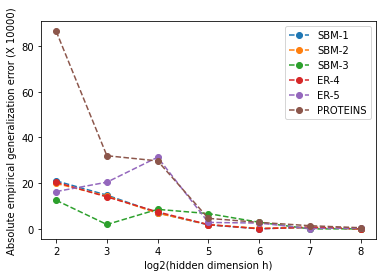

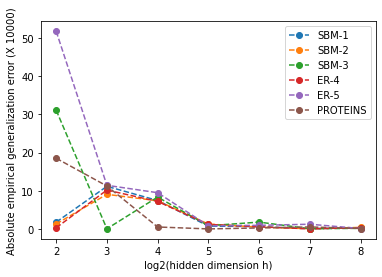

In [4]:
# plot
datasets = ['SBM-1', 'SBM-2', 'SBM-3', 'ER-4', 'ER-5', 'PROTEINS']
train_ratio_list = [0.7] 
GNN_list = ['GCN_mean', 'MPGNN_mean']
hidden_list = [4, 8, 16, 32, 64, 128, 256]
seed_list = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
log_hidden_list = [np.log2(h) for h in hidden_list]

plt.figure()
for model_type in GNN_list:
    all_results = np.zeros((len(datasets) * len(train_ratio_list), len(hidden_list), len(seed_list)))
    all_results[:] = np.nan
    combo_list = []
    first_ind = 0
    for dataset in datasets:
        for train_ratio in train_ratio_list:
            for hidden_ind, hidden_dim in enumerate(hidden_list):
                for seed_ind, random_seed in enumerate(seed_list):
                    file_name = '../result_arrays/' + '{}_{}_seed_{}_{}_hidden{}_100train_ratio{}_alpha{}'.format(
                    dataset, 'w_consts', random_seed, model_type, hidden_dim, int(100*train_ratio), 
                    alpha) + '_excess_risk.npy'
                    try:
                        all_results[first_ind, hidden_ind, seed_ind] = np.load(file_name)[-1]
                    except FileNotFoundError:
                        pass
            combo_list.append(dataset)
            first_ind += 1
    all_results = all_results * 100000 # enlarge the values to avoid scientific notation
    if not np.isnan(all_results).all():
        results_mean = np.nanmean(all_results, axis=2)
        for i in range(len(combo_list)):
            if not np.isnan(results_mean[i]).all():
                plt.plot(log_hidden_list, abs(results_mean[i]), label=combo_list[i], linestyle='dashed', marker='o')
    plt.legend()
    plt.xlabel('log2(hidden dimension h)')
    plt.ylabel('Absolute empirical generalization error (X 10000)')
    plt.savefig(model_type+'_abs_ge_70sup.pdf', format='pdf')
    plt.show()